<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine2/blob/main/WOMAC_Total_Regression_2022_08_30_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.31_Final_Original.csv")
#dataset=pd.read_csv("/content/drive/MyDrive/SNU Research/KOA-EMG/KOA_EMG_WOMAC__2022.08.31_Final_Original.csv")


In [3]:
dataset.head(10)

,Patient ID,Data Type,Bone-Attribution,WOMAC_Pain,WOMAC_Pain Grade,WOMAC_Stiffness,WOMAC_Stiffness Grade,WOMAC_Physical function,WOMAC_MHhysical function Grade,WOMAC_total,...,TA-G-100,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,14532,Training,X,1,Mild,0,Mild,0,Mild,1,...,4269.232140,314.177136,83.881646,614.154385,389.333912,4.029312,2455.665071,1.239218,0.048036,3.998449
1,13006,Training,O,0,Mild,1,Mild,10,Mild,11,...,65.800971,153.624580,149.559102,59.698432,530.638524,65.285482,185.501568,3.454125,0.436520,3.107311
2,14373,Training,O,4,Mild,2,Mild,9,Mild,15,...,86.614998,125.859434,114.518337,132.695202,127.098338,58.201908,212.701083,1.009844,0.508232,1.602930
3,14373,Training,X,5,Mild,2,Mild,9,Mild,16,...,171.324511,194.930312,118.944821,291.965714,226.350609,136.797883,213.451755,1.161187,1.150095,0.731085
4,14611,Training,X,4,Mild,2,Mild,10,Mild,16,...,91.740579,97.493205,129.490095,93.110953,139.803202,62.961889,133.977754,1.433979,0.486229,1.438904
5,14396,Training,X,3,Mild,2,Mild,14,Mild,19,...,71.115243,93.166435,205.276960,124.759042,74.937783,49.342965,186.238764,0.804343,0.240373,1.492788
6,14532,Training,O,5,Mild,0,Mild,14,Mild,19,...,423.595797,50.351075,215.589472,147.490066,135.210984,14.404263,788.175477,2.685364,0.066813,5.343922
7,14417,Training,X,5,Mild,2,Mild,14,Mild,21,...,1007.564888,236.522111,85.298540,401.009594,306.329810,11.947454,938.434479,1.295142,0.140066,2.340180
8,14315,Training,X,3,Mild,0,Mild,19,Mild,22,...,288.901451,272.857378,113.760720,269.374236,527.035183,53.072994,405.670765,1.931541,0.466532,1.505975
9,12435,Training,X,4,Mild,2,Mild,17,Mild,23,...,76.648348,158.726742,198.202890,94.353370,135.926913,82.676272,83.944362,0.856358,0.417129,0.889681


In [4]:
dataset.shape

(150, 812)

In [5]:
X = dataset.iloc[:,17:]
y = dataset.iloc[:, 9]

In [ ]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

In [6]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [21 22 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [7]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [8]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [9]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 200


In [10]:
imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

              Specs     Score
777         TA-G-92  8.693856
778         TA-G-93  8.503520
779         TA-G-94  8.423347
776         TA-G-91  8.210069
780         TA-G-95  7.461294
..              ...       ...
375            RF94  1.278243
71    Stddev_RECTUS  1.277695
303            RF22  1.277512
602         G-MH-18  1.276391
185             MH5  1.276181

[200 rows x 2 columns]


In [11]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [12]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 9]

In [16]:
!pip install shap
import shap

def explain_shap(model,temp_X,max_dis=20):
  explainer = shap.Explainer(model.predict, temp_X)
  shap_values = explainer (temp_X)
  shap.plots.bar(shap_values,max_display=max_dis)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 3.7 MB/s 


<font color = "red" size='5'>No spliting </font>

In [ ]:
#X_train=X_new.iloc[:120,:]  
#X_test=X_new.iloc[120:,:]
#y_train=y_new.iloc[:120]
#y_test=y_new.iloc[120:]

#Linear Regression <font color = "red" size='5'> (previous Version)</font>

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


###Taining Ploting and Result

In [ ]:
y_pred_train = lin_reg.predict(X_train)

print(y_pred.shape)
from sklearn.metrics import r2_score,mean_squared_error
print("Training r2: ",r2_score(y_train,y_pred_train))


r_sq = lin_reg.score(X_new, y_new)
print("Training r_sq: ",r_sq)





(30,)
Training r2:  0.8663078722202997
Training r_sq:  -0.4832354291644758


In [ ]:
r_sq_train = lin_reg.score(X_train, y_pred_train)
print(r_sq_train)

1.0


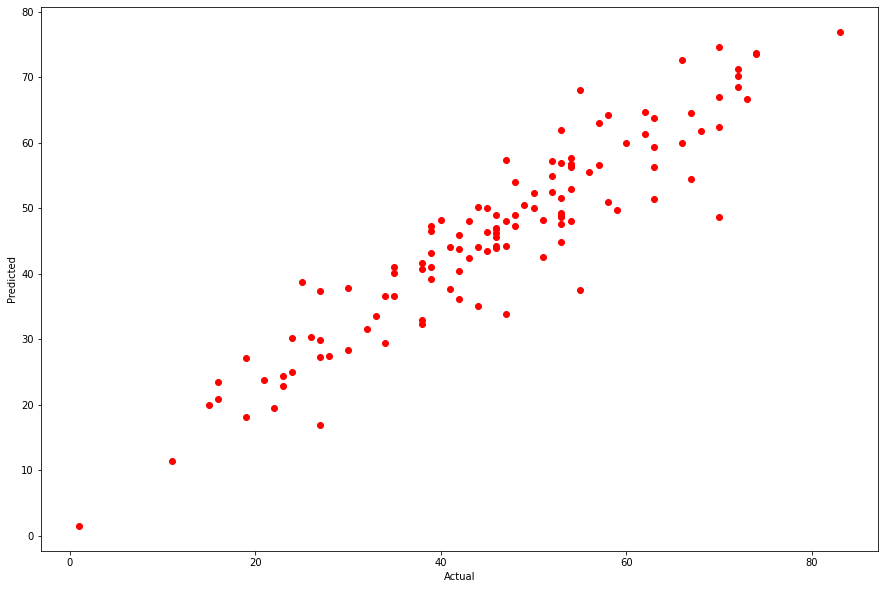

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred_train, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [ ]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_train,
        "Predicted Value":y_pred_train,
        "Difference":y_train-y_pred_train
    }
)

pred_y_df

,Actual Value,Predicted Value,Difference
0,1,1.477153,-0.477153
1,11,11.355232,-0.355232
2,15,19.961281,-4.961281
3,16,20.924647,-4.924647
4,16,23.449502,-7.449502
...,...,...,...
115,72,70.112884,1.887116
116,73,66.632304,6.367696
117,74,73.671930,0.328070
118,74,73.546048,0.453952


In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred_train))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred_train))



Mean squared error: 32.86
Coefficient of determination: 0.87


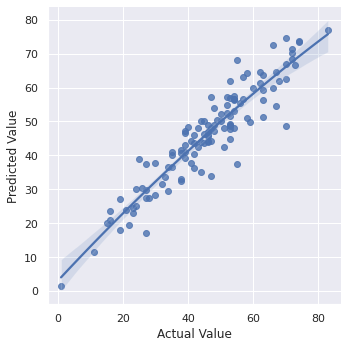

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)



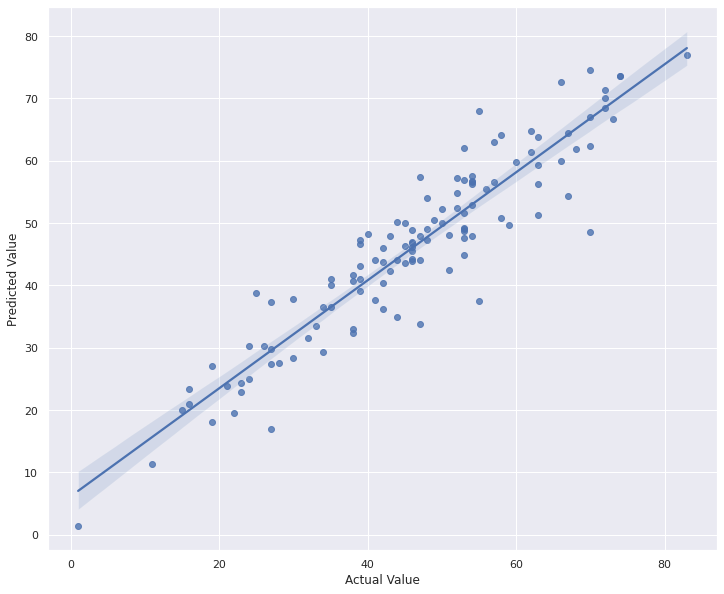

In [ ]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);




###Testing Ploting and Result

In [ ]:
y_pred_test = lin_reg.predict(X_test)


from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred_test))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -3.2186644078407545
R_sq:  -0.4832354291644758


In [ ]:
r_sq_test = lin_reg.score(X_test, y_pred_test)
print(r_sq_test)

1.0


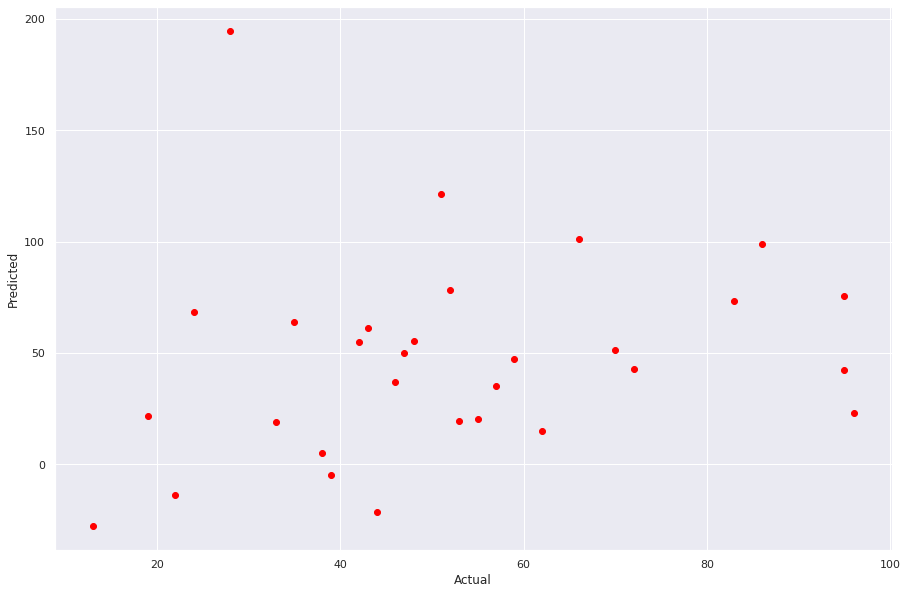

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_test,
        "Predicted Value":y_pred_test,
        "Difference":y_test-y_pred_test
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
120,86,98.711879,-12.711879
121,95,42.414642,52.585358
122,96,23.191518,72.808482
123,13,-27.531686,40.531686
124,19,21.883326,-2.883326
125,22,-13.803539,35.803539
126,24,68.547302,-44.547302
127,28,194.371461,-166.371461
128,33,18.898742,14.101258
129,35,64.035652,-29.035652


In [ ]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))


Mean squared error: 2117.40
Coefficient of determination: -3.22


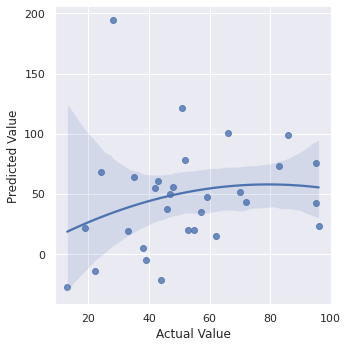

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)

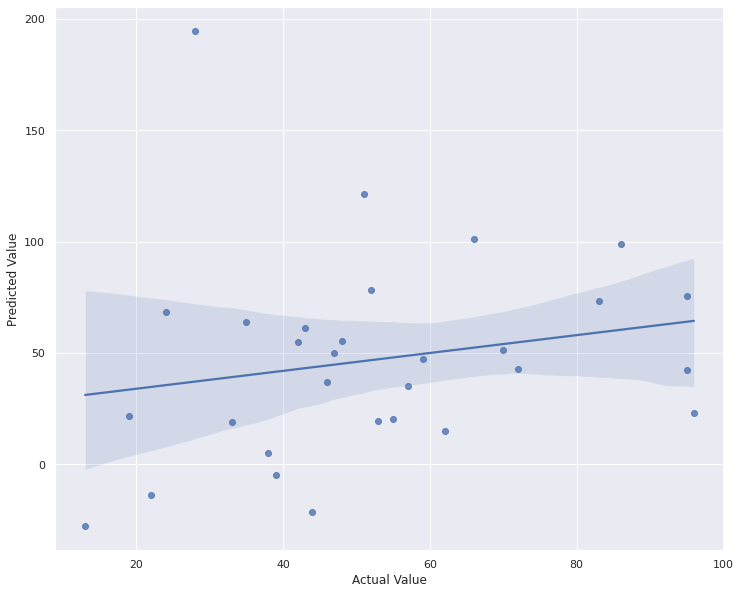

In [ ]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);

###Over All dataset Ploting and Results

In [ ]:
y_pred_new = lin_reg.predict(X_new)


from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_new,y_pred_new))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -0.4832354291644758
R_sq:  -0.4832354291644758


In [ ]:
r_sq_test = lin_reg.score(X_new, y_pred_new)
print(r_sq_test)

1.0


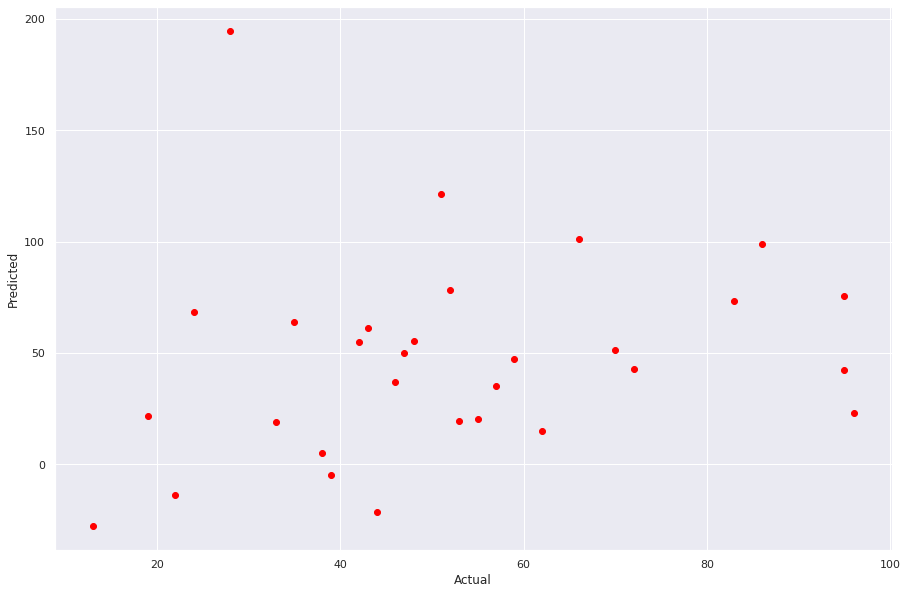

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_new,
        "Predicted Value":y_pred_new,
        "Difference":y_new-y_pred_new
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
0,1,1.477153,-0.477153
1,11,11.355232,-0.355232
2,15,19.961281,-4.961281
3,16,20.924647,-4.924647
4,16,23.449502,-7.449502
...,...,...,...
145,66,100.939452,-34.939452
146,70,51.432738,18.567262
147,72,42.868409,29.131591
148,83,73.415767,9.584233


In [ ]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_new, y_pred_new))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_new, y_pred_new))


Mean squared error: 449.77
Coefficient of determination: -0.48


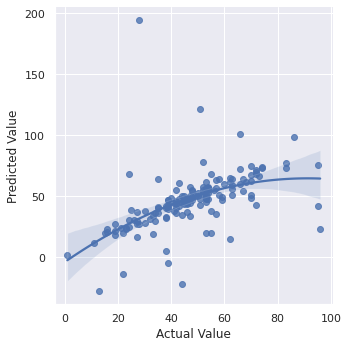

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)

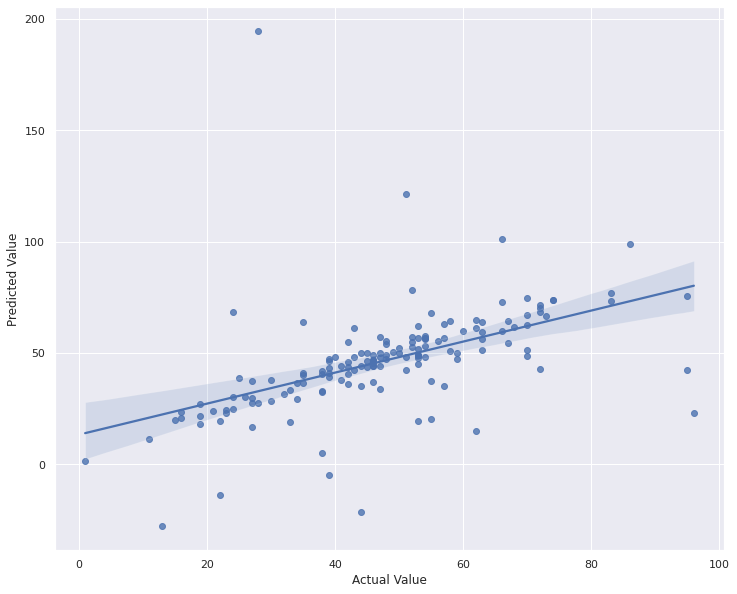

In [ ]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);

**SHAP**

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


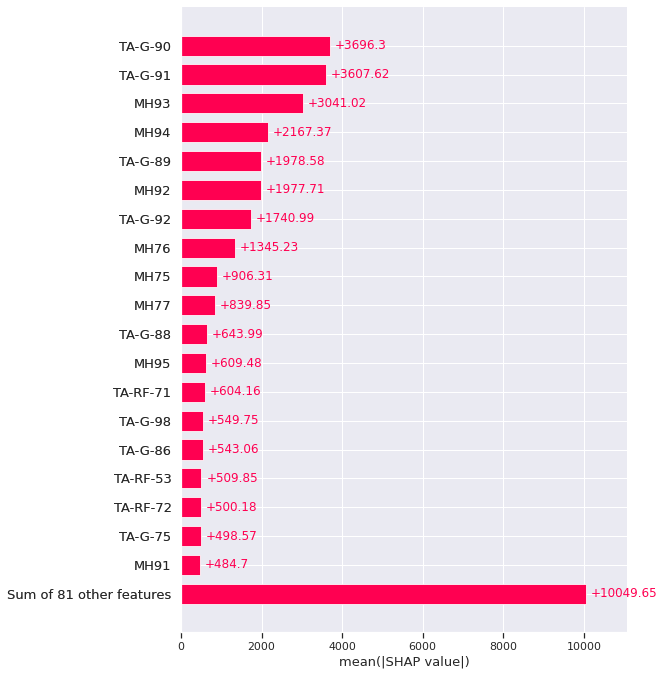

In [ ]:
import pandas as pd
import shap
import sklearn
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer (X_train)
shap.plots.bar(shap_values,max_display=20)

#-------------------

#Decision Tree Regressor



In [35]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor


for i in range(2,1000):
  regr = DecisionTreeRegressor(max_depth=i)
  regr.fit(X_new, y_new)
  y_pred = regr.predict(X_new)
  from sklearn.metrics import r2_score,mean_squared_error
  print("Training r2: ",r2_score(y_new,y_pred),", When Max Depth:",i)
  if r2_score(y_new,y_pred) ==1:
    mx=i-1
    break


Training r2:  0.2796703332611181 , When Max Depth: 2
Training r2:  0.4253973605847887 , When Max Depth: 3
Training r2:  0.5811094999558339 , When Max Depth: 4
Training r2:  0.7628127295534188 , When Max Depth: 5
Training r2:  0.8971505897878373 , When Max Depth: 6
Training r2:  0.9589307009371623 , When Max Depth: 7
Training r2:  0.9835518058156926 , When Max Depth: 8
Training r2:  0.993676699300932 , When Max Depth: 9
Training r2:  0.9987238063076758 , When Max Depth: 10
Training r2:  0.9999010661985852 , When Max Depth: 11
Training r2:  1.0 , When Max Depth: 12


Permutation explainer: 151it [00:13,  2.88it/s]


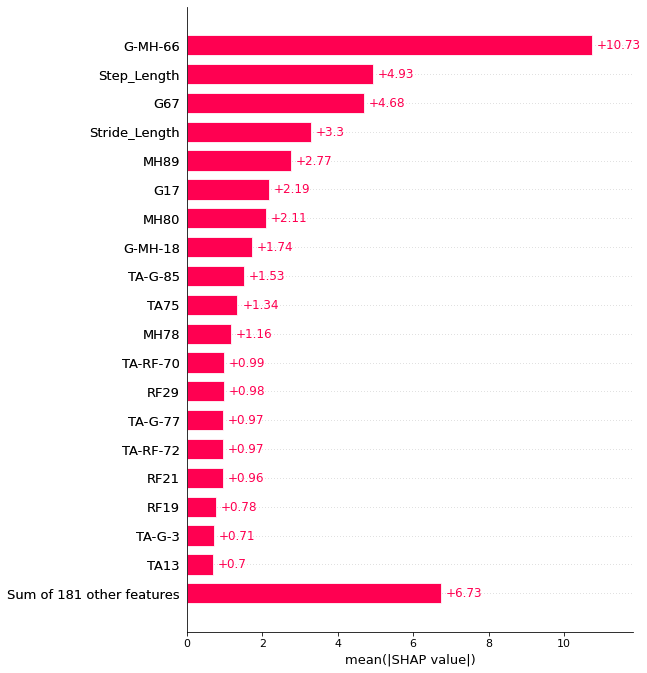

In [36]:

regr = DecisionTreeRegressor(max_depth=mx)
regr.fit(X_new, y_new)

explain_shap(regr,X_new,20)

#Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


count=[]
mx_depth=[]

for i in range(2,150):
  rfr = RandomForestRegressor(max_depth=i)

  rfr.fit(X_new, y_new)
  y_pred = rfr.predict(X_new)
  r2=r2_score(y_new,y_pred)
  print("Training r2: ",r2,", When Max Depth:",i)
  count.append(r2)
  mx_depth.append(i)
  
print("Max R2: ",max(count)," Max Depth: ",mx_depth[count.index(max(count))])

Training r2:  0.3771920611410604 , When Max Depth: 2
Training r2:  0.534234934636541 , When Max Depth: 3
Training r2:  0.6612145421570252 , When Max Depth: 4
Training r2:  0.7617828391714314 , When Max Depth: 5
Training r2:  0.7983375779535927 , When Max Depth: 6
Training r2:  0.8411438685399077 , When Max Depth: 7
Training r2:  0.8514869861154626 , When Max Depth: 8
Training r2:  0.8580022134877179 , When Max Depth: 9
Training r2:  0.8680364230534956 , When Max Depth: 10
Training r2:  0.8595113160236352 , When Max Depth: 11
Training r2:  0.8580536459544932 , When Max Depth: 12
Training r2:  0.8596347980130027 , When Max Depth: 13
Training r2:  0.8530756343760123 , When Max Depth: 14
Training r2:  0.8541489087138338 , When Max Depth: 15
Training r2:  0.8543372870744153 , When Max Depth: 16
Training r2:  0.8608207271075345 , When Max Depth: 17
Training r2:  0.8729351086600934 , When Max Depth: 18
Training r2:  0.8656581450220029 , When Max Depth: 19
Training r2:  0.8587749906782374 , Wh

Permutation explainer: 151it [01:31,  1.47it/s]


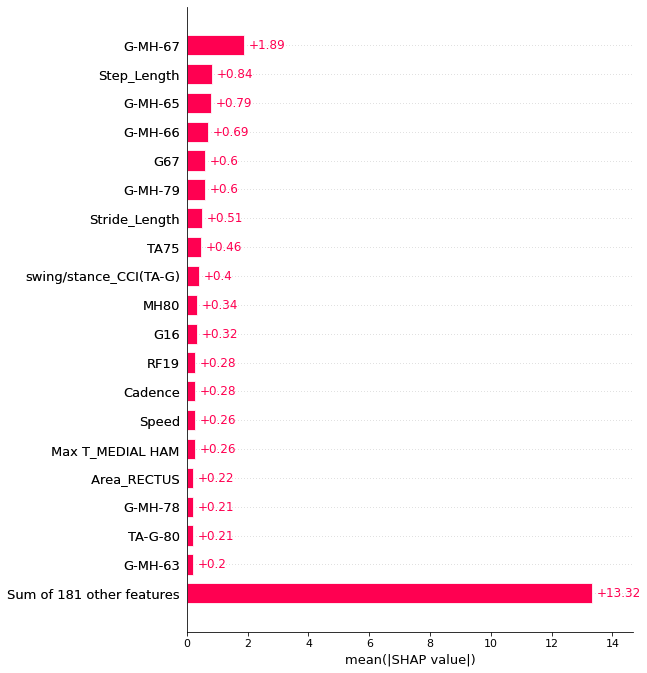

In [28]:
regr = RandomForestRegressor(max_depth=mx_depth[count.index(max(count))])
regr.fit(X_new, y_new)

explain_shap(regr,X_new,20)

#Support Vector Regression (SVR)

In [29]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_new, y_new)
         
y_pred_train = regr.predict(X_new)
print("R2 score: ", r2_score(y_new,y_pred_train))

R2 score:  0.07780323450043125


Permutation explainer: 151it [04:36,  1.91s/it]


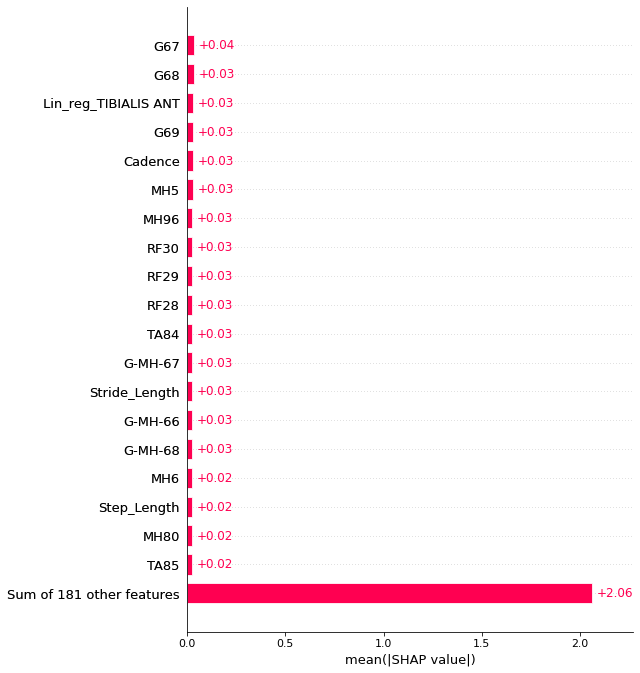

In [30]:
explain_shap(regr,X_new,20)

#Ridge Regressor

In [31]:
from sklearn.linear_model import Ridge
regr = Ridge(alpha=1.0)
regr.fit(X_new, y_new)

y_pred_train = regr.predict(X_new)
print("R2 score: ", r2_score(y_new,y_pred_train))

R2 score:  0.998114563659743


Permutation explainer: 151it [00:13,  2.81it/s]                         


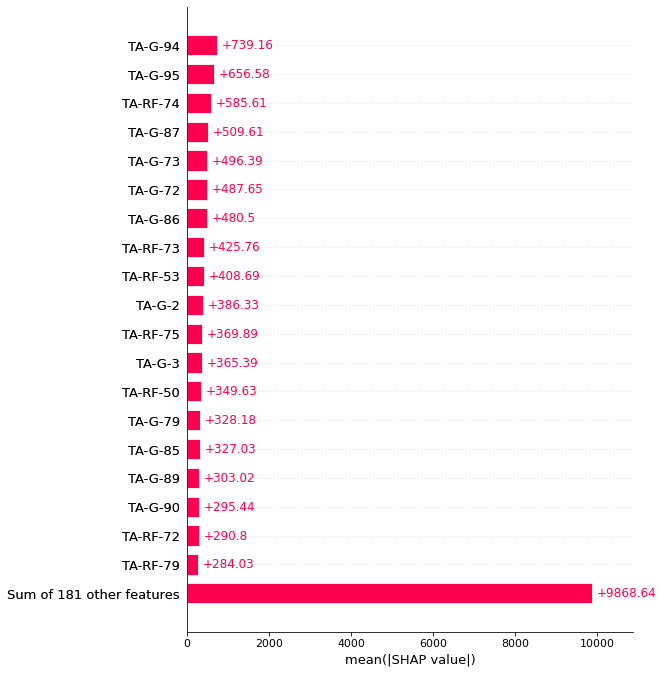

In [32]:
explain_shap(regr,X_new,20)

#Lasso Regressor

In [33]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=0.1)
regr.fit(X_new, y_new)

y_pred_train = regr.predict(X_new)
print("R2 score of Training: ", r2_score(y_new,y_pred_train))

R2 score of Training:  0.8288292492761772


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.740e+03, tolerance: 4.548e+00


Permutation explainer: 151it [00:13,  2.86it/s]


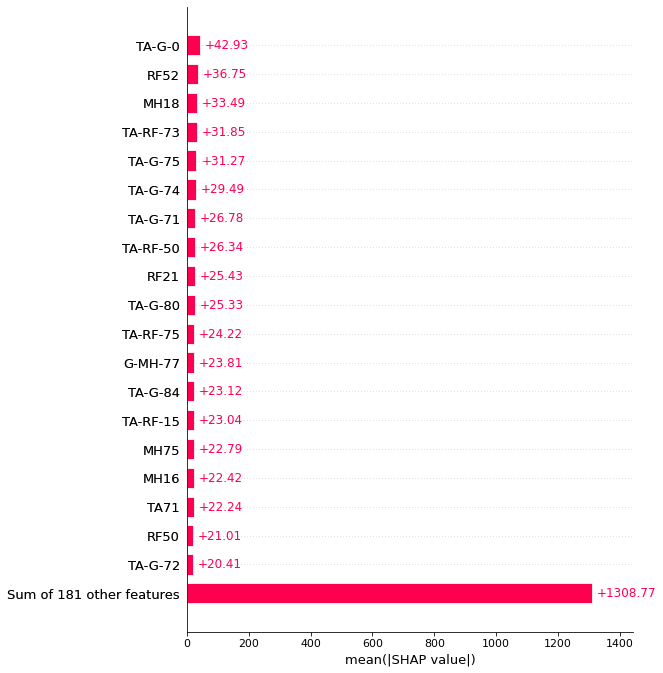

In [34]:
explain_shap(regr,X_new,20)